## Keras - QMNIST MLP
#### We use the QMNIST file which is MNIST with 120.000 digits
### see https://github.com/facebookresearch/qmnist

In [16]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # to disable GPU

from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
import numpy as np

import tensorflow as tf
import matplotlib.pyplot as plt


    A couple of utility functions

In [17]:
def Analyze_training(h):
# summarize history for accuracy
   plt.plot(h.history['accuracy'])
   plt.plot(h.history['val_accuracy'])
   plt.title('model accuracy')
   plt.ylabel('accuracy')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
# summarize history for loss
   plt.plot(h.history['loss'])
   plt.plot(h.history['val_loss'])
   plt.title('model loss')
   plt.ylabel('loss')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
   return
# Uploads into 6 arrays contents of MNIST.npz
# # train_size in percentage
# Remaining test is divided by 2
def QMNIST_load_data(file_name,train_size):
   # train size = x%
   file = np.load(file_name)

   a = file['arr_0']
   b = file['arr_1']
   c = file['arr_2']
   d = file['arr_3']
   X = np.concatenate((a, c), axis=0)
   Y = np.concatenate((b, d), axis=0)
   X = X.reshape(len(X), 784)
   l = len(X)  # total lenght
   p1 = int(len(X)*(train_size/100))
   p2 = int((l-p1)/2)
   return (X[0:p1],Y[0:p1]),(X[p1:p1+p2], Y[p1:p1+p2]), (X[p1+p2+1:l+1], Y[p1+p2+1:l+1])

    Observe how different is the graph of accuracy and loss

In [18]:
batch_size = 128
num_classes = 10
epochs = 20
hlayer1 = 512
hlayer2 = 512

In [19]:
# data preparation

In [20]:
file_name = './DAL_workshop_datasets/QMNIST.npz'
(x_train, y_train),(x_test, y_test),(x_val,y_val) = QMNIST_load_data(file_name,70) # 70% train 30% test
print('Train len',len(x_train))
print('Test len',len(x_test))
print('Val len',len(x_val))

print(x_train.shape)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')

x_train /= 255
x_test  /= 255
x_val   /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_val.shape[0], 'validation samples')


Train len 84000
Test len 18000
Val len 17999
(84000, 784)
84000 train samples
18000 test samples
17999 validation samples


In [21]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_val = to_categorical(y_val, num_classes)
y_train.shape

(84000, 10)

### Network definition

In [22]:
model = Sequential()
model.add(Dense(hlayer1, activation='relu', input_shape=(784,)))
model.add(Dropout(rate=0.2))
model.add(Dense(hlayer2, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


    Fit Trains Network !

In [23]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/20
657/657 [==============================] - 5s 8ms/step - loss: 0.2103 - accuracy: 0.9355 - val_loss: 0.1488 - val_accuracy: 0.9512
Epoch 2/20
657/657 [==============================] - 5s 8ms/step - loss: 0.0917 - accuracy: 0.9727 - val_loss: 0.0782 - val_accuracy: 0.9778
Epoch 3/20
657/657 [==============================] - 5s 8ms/step - loss: 0.0708 - accuracy: 0.9791 - val_loss: 0.0703 - val_accuracy: 0.9797
Epoch 4/20
657/657 [==============================] - 5s 7ms/step - loss: 0.0577 - accuracy: 0.9829 - val_loss: 0.0697 - val_accuracy: 0.9811
Epoch 5/20
657/657 [==============================] - 5s 8ms/step - loss: 0.0502 - accuracy: 0.9855 - val_loss: 0.0794 - val_accuracy: 0.9795
Epoch 6/20
657/657 [==============================] - 5s 8ms/step - loss: 0.0440 - accuracy: 0.9866 - val_loss: 0.0791 - val_accuracy: 0.9813
Epoch 7/20
657/657 [==============================] - 5s 8ms/step - loss: 0.0400 - accuracy: 0.9888 - val_loss: 0.0780 - val_accuracy: 0.9823
Epoch 

In [27]:
score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score = model.evaluate(x_train, y_train, verbose=0)
print('Train accuracy:', score[1])


Test loss: 0.14017942547798157
Test accuracy: 0.9838324189186096
Train accuracy: 0.9988571405410767


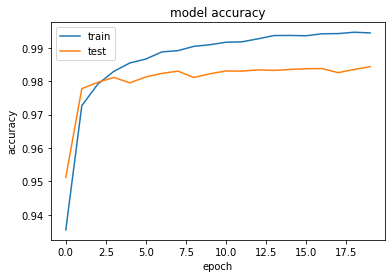

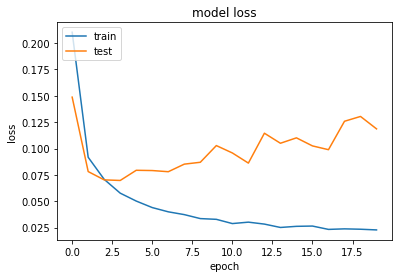

In [28]:
Analyze_training(history)

In [ ]:
#EOF